In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

In [52]:
deliveries_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv("IPL Matches 2008-2020.csv")
print("Data is ready")

Data is ready


In [53]:
match_data.head()
#match_data.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [54]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [55]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [56]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [57]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [58]:
deliveries_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [59]:
deliveries_data.shape

(193468, 18)

In [60]:
match_data.shape

(816, 17)

In [61]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [62]:
print('Total Matches Played: ', match_data.shape[0])

Total Matches Played:  816


In [63]:
print("Venues played at: ", match_data['city'].unique() )

Venues played at:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [64]:
print("Teams played: ", match_data['team1'].unique())

Teams played:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [65]:
#season data addition
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [66]:
match_per_season = match_data.groupby(['Season'])['id'].count()

In [67]:
match_per_season = match_per_season.reset_index().rename(columns={'id': 'matches'})

In [68]:
match_per_season.style.background_gradient(cmap='PuBu')

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


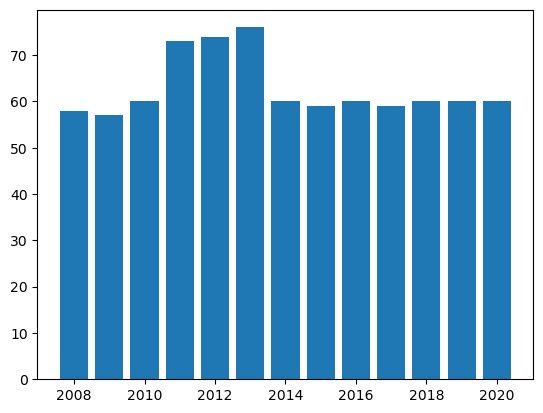

In [69]:
fig = plt.bar(match_per_season.Season, match_per_season.matches)

In [70]:
#including the season in deliveries_data to calculate the total runs scored in a given season
season_data = match_data[['id', 'Season']].merge(deliveries_data, left_on = 'id', right_on='id', how='left')

In [71]:
season_data.head()

,id,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [72]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [73]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [74]:
season_data.shape

(193468, 19)

In [75]:
deliveries_data.shape

(193468, 18)

In [76]:
match_data.shape

(816, 18)

In [77]:
season_runs = season_data.groupby(['Season'])['total_runs'].sum().reset_index()

In [78]:
fig = px.line(x=season_runs.Season, y=season_runs.total_runs)
fig.show()

In [79]:
#we need to find the avg number of runs scored per match
season_runs

,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [80]:
#concatenate the number of matches played each season
#divide the number of runs / number of matches
runs_per_season = pd.concat([match_per_season, season_runs.iloc[:,1]], axis=1)
runs_per_season

,Season,matches,total_runs
0,2008,58,17937
1,2009,57,16320
2,2010,60,18864
3,2011,73,21154
4,2012,74,22453
5,2013,76,22541
6,2014,60,18909
7,2015,59,18332
8,2016,60,18862
9,2017,59,18769


In [81]:
#try to merge the number of seasons on the right side
runs_per_season = season_runs.merge(match_per_season, left_on='Season', right_on='Season', how='right')
runs_per_season

,Season,total_runs,matches
0,2008,17937,58
1,2009,16320,57
2,2010,18864,60
3,2011,21154,73
4,2012,22453,74
5,2013,22541,76
6,2014,18909,60
7,2015,18332,59
8,2016,18862,60
9,2017,18769,59


In [82]:
#Now add a new column
runs_per_season['runs_per_match'] = runs_per_season['total_runs']/runs_per_season['matches']
fig = px.line(data_frame=runs_per_season, x=runs_per_season['Season'],y=runs_per_season['runs_per_match'])
fig.show()

In [83]:
#Ump details
ump = pd.concat([match_data['umpire1'], match_data['umpire2']])

In [84]:
ump

0        Asad Rauf
1        MR Benson
2        Aleem Dar
3         SJ Davis
4        BF Bowden
          ...     
811     PR Reiffel
812    Nitin Menon
813         S Ravi
814         S Ravi
815    Nitin Menon
Length: 1632, dtype: object

In [85]:
ump.shape

(1632,)

In [86]:
ump = ump.value_counts()

In [87]:
ump = ump.to_frame().reset_index()

In [88]:
ump

,index,count
0,S Ravi,121
1,HDPK Dharmasena,94
2,AK Chaudhary,87
3,C Shamshuddin,82
4,M Erasmus,65
5,CK Nandan,57
6,Nitin Menon,57
7,SJA Taufel,55
8,Asad Rauf,51
9,VA Kulkarni,50


In [89]:
match_data['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [97]:
toss_dec = match_data['toss_decision'].value_counts()
toss_dec = toss_dec.to_frame()
toss_dec    

,count
toss_decision,
field,496
bat,320


In [101]:
fig = px.pie(toss_dec,names=toss_dec['count'], values=toss_dec['count'])
fig.show()

In [103]:
#toss decision across seasons
fig = px.histogram(data_frame=match_data, x='Season', color='toss_decision', barmode='group')
fig.show()

In [104]:
#toss win = game win ?
match_data['toss_win_game_win'] = np.where((match_data['toss_winner'] == match_data['winner']), 'Yes', 'No')

In [106]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No


In [124]:
match_win = match_data['toss_win_game_win'].value_counts()
match_win = match_win.to_frame().reset_index()
match_win
fig = px.pie(data_frame=match_win, values='count', names = 'toss_win_game_win')
fig.show()


In [125]:
#how were the matches won
res = match_data['result'].value_counts().to_frame().reset_index()

In [126]:
fig = px.pie(data_frame=res, values = 'count', names = 'result')
fig.show()

In [127]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No


In [129]:
#total matches played by different teams
all_matches = pd.concat([match_data['team1'], match_data['team2']],axis=1)
all_matches

,team1,team2
0,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals
3,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers
...,...,...
811,Royal Challengers Bangalore,Mumbai Indians
812,Mumbai Indians,Delhi Capitals
813,Royal Challengers Bangalore,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad


In [145]:
teams = (all_matches['team1'].value_counts()+all_matches['team2'].value_counts()).reset_index()

In [151]:
teams
teams.columns = ['team name', 'total matches played']
type(teams)

pandas.core.frame.DataFrame

In [150]:
teams = teams.sort_values(by = ['total matches played'], ascending=False)
teams

,team name,total matches played
8,Mumbai Indians,203
13,Royal Challengers Bangalore,195
7,Kolkata Knight Riders,192
5,Kings XI Punjab,190
0,Chennai Super Kings,178
3,Delhi Daredevils,161
10,Rajasthan Royals,161
14,Sunrisers Hyderabad,124
1,Deccan Chargers,75
9,Pune Warriors,46


In [152]:
fig = px.bar(data_frame=teams, x='team name', y='total matches played')
fig.show()

In [154]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No


In [158]:
#number of wins team wise
team_win = match_data[['winner']]
team_win


,winner
0,Kolkata Knight Riders
1,Chennai Super Kings
2,Delhi Daredevils
3,Royal Challengers Bangalore
4,Kolkata Knight Riders
...,...
811,Royal Challengers Bangalore
812,Mumbai Indians
813,Sunrisers Hyderabad
814,Delhi Capitals


In [159]:

team_win = team_win['winner'].value_counts()

In [170]:
team_win = team_win.reset_index()


In [172]:
fig = px.bar(data_frame=team_win, x='winner', y='count')
fig.show()

In [181]:
#finding winning percentage for each team
win_percentage = teams.merge(right=team_win, left_on = 'team name', right_on='winner', how='right')
win_percentage = win_percentage.drop(['winner'],axis=1)
win_percentage.columns = ['Team Name', 'Total matches played', 'Total Matches won']
win_percentage['Percentage won'] = win_percentage['Total Matches won']*100/win_percentage['Total matches played']
win_percentage.sort_values(by = ['Percentage won'], ascending=False)

,Team Name,Total matches played,Total Matches won,Percentage won
12,Rising Pune Supergiant,16,10,62.500000
1,Chennai Super Kings,178,106,59.550562
0,Mumbai Indians,203,120,59.113300
9,Delhi Capitals,33,19,57.575758
7,Sunrisers Hyderabad,124,66,53.225806
2,Kolkata Knight Riders,192,99,51.562500
5,Rajasthan Royals,161,81,50.310559
3,Royal Challengers Bangalore,195,91,46.666667
4,Kings XI Punjab,190,88,46.315789
10,Gujarat Lions,30,13,43.333333


In [183]:
fig = px.bar(data_frame=win_percentage, x='Team Name', y='Percentage won')
fig.show()

In [184]:
#Kohli Analysis
df_kohli = deliveries_data[deliveries_data['batsman']=='V Kohli']

In [185]:
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [186]:
#total runs scored by Kohli
df_kohli['batsman_runs'].sum()

5878

In [187]:
#scores of each match
high_scores = deliveries_data.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [191]:
#scores 200 plus in both innings
score_200_plus = high_scores[high_scores['total_runs']>=200]
score_200_plus

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207
14,335989,1,Chennai Super Kings,Mumbai Indians,208
15,335989,2,Mumbai Indians,Chennai Super Kings,202
...,...,...,...,...,...
1600,1216538,1,Mumbai Indians,Sunrisers Hyderabad,208
1608,1216542,1,Sunrisers Hyderabad,Kings XI Punjab,201
1618,1216547,1,Royal Challengers Bangalore,Mumbai Indians,201
1619,1216547,2,Mumbai Indians,Royal Challengers Bangalore,201


In [192]:
#200 plus core first inning
x1 = score_200_plus['batting_team'].value_counts()

In [193]:
x1

batting_team
Royal Challengers Bangalore    18
Chennai Super Kings            17
Kings XI Punjab                14
Mumbai Indians                 14
Kolkata Knight Riders          12
Sunrisers Hyderabad            12
Rajasthan Royals                9
Delhi Daredevils                5
Delhi Capitals                  2
Deccan Chargers                 1
Gujarat Lions                   1
Name: count, dtype: int64

In [194]:
#200 plus scores 2nd inning
x2 = score_200_plus['bowling_team'].value_counts()

In [195]:
x2

bowling_team
Kings XI Punjab                20
Royal Challengers Bangalore    17
Chennai Super Kings            12
Delhi Daredevils               11
Rajasthan Royals               10
Kolkata Knight Riders          10
Mumbai Indians                  8
Sunrisers Hyderabad             7
Gujarat Lions                   3
Delhi Capitals                  3
Deccan Chargers                 2
Pune Warriors                   1
Rising Pune Supergiant          1
Name: count, dtype: int64

In [196]:
#biggest margin win
match_data[match_data['result_margin'] == match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,No


In [201]:
#balls played by players
balls_played = deliveries_data.groupby(['batsman'])['ball'].count().reset_index()
balls_played = balls_played.sort_values(by = 'ball', ascending=False)
balls_played.head(10)

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
398,RV Uthappa,3658
154,G Gambhir,3524
301,MS Dhoni,3493
96,CH Gayle,3342
42,AM Rahane,3325


In [202]:
#dismissals
dismissals = deliveries_data['dismissal_kind'].unique()

In [203]:
dismissals

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [204]:
dismissal_types = ['caught','bowled','caught and bowled', 'stumped', 'hit wicket']

In [205]:
wicket_takers = deliveries_data[deliveries_data['dismissal_kind'].isin(dismissal_types)]

In [206]:
bowlers = wicket_takers['bowler'].value_counts()

In [207]:
type(bowlers)

pandas.core.series.Series

In [208]:
bowlers

bowler
SL Malinga         159
A Mishra           147
DJ Bravo           147
Harbhajan Singh    142
PP Chawla          139
                  ... 
AA Noffke            1
A Uniyal             1
SS Sarkar            1
AM Rahane            1
JR Hazlewood         1
Name: count, Length: 360, dtype: int64